In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

%matplotlib inline

Please download only the fashion_mnist_test.csv file from this [kaggle](https://www.kaggle.com/zalando-research/fashionmnist?select=fashion-mnist_test.csv) link.

In [3]:
df = pd.read_csv("/tmp/fashion-mnist_test.csv")
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


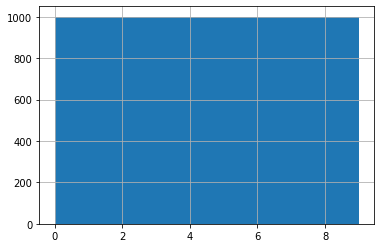

In [5]:
df.label.hist();

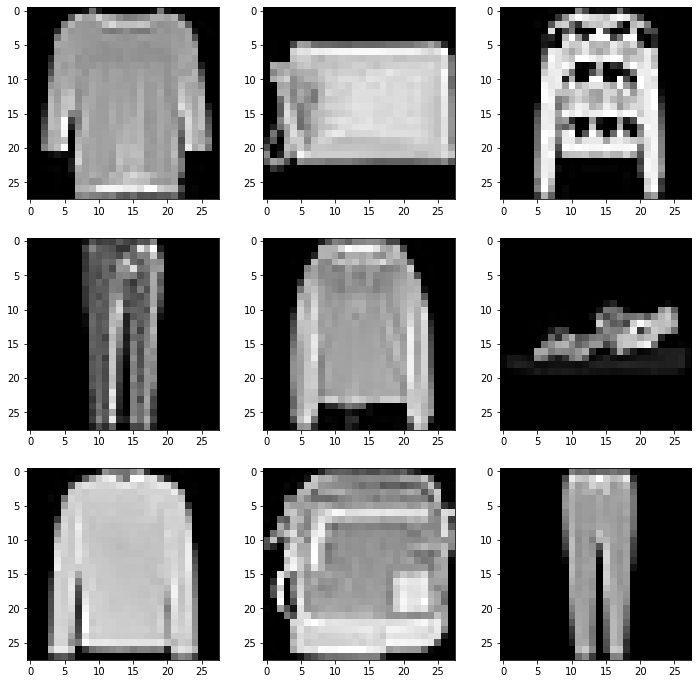

In [21]:
images = df.iloc[:,1:].values
images = images.reshape(-1, 28, 28)

fig, ax = plt.subplots(3, 3, figsize=(12, 12))
for i in range(3):
    for j in range(3):
        img = random.choice(images)
        ax[i][j].imshow(img, cmap="gray")

In [22]:
from sklearn.decomposition import PCA

In [24]:
images.shape

(10000, 28, 28)

In [26]:
pca = PCA(n_components=10)
pca.fit(images.reshape(10000, -1))

print(pca.explained_variance_ratio_)

print(pca.singular_values_)

[0.2902809  0.17902619 0.05961972 0.04979193 0.03836568 0.03444554
 0.02347631 0.0186074  0.01368026 0.01324781]
[113671.8535492   89269.27242492  51515.59102411  47078.56083058
  41325.21805281  39157.07075573  32326.49745976  28779.72032382
  24676.91839284  24283.75042065]


In [27]:
np.cumsum(pca.explained_variance_ratio_)

array([0.2902809 , 0.46930709, 0.52892681, 0.57871874, 0.61708442,
       0.65152995, 0.67500627, 0.69361367, 0.70729393, 0.72054174])

In [28]:
images_low_dim = pca.transform(images.reshape(10000, -1))
images_low_dim.shape

(10000, 10)

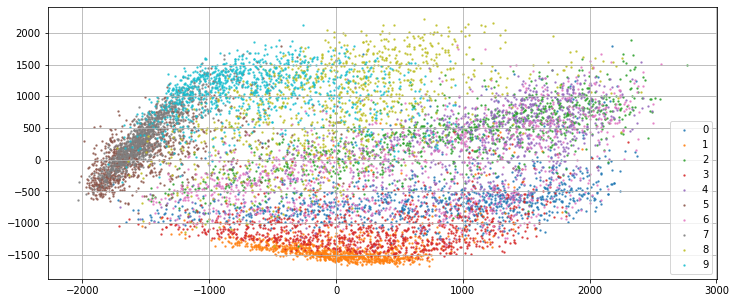

In [35]:
plt.figure(figsize=(12, 5))
for i in range(df["label"].nunique()):
    idx = df["label"] == i
    plt.scatter(images_low_dim[idx, 0], images_low_dim[idx, 1], label=str(i), alpha=0.7, s=2)

plt.grid()
plt.legend()
plt.show()